**Stage 1 EDA**

Name     : Muhammed Abinsaj S

Project Title: In-Vehicle Coupon Recommendation

# DESCRIPTIVE STATISTICS

In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [3]:
#import dataset
df = pd.read_csv("in-vehicle-coupon-recommendation.csv")

#checking dataset info
print('Dataset Info: ')
print(df.info())

#checking missing values in dataset
print('Missing Values: ')
print(df.isna().sum())

Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                  

In [4]:
#showing off the whole data
pd.set_option('display.max_columns', None)
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
#looping to categorize cat include categorical columns and num include numeric columns
cat = []
num = []
for col in df.columns: 
    if df[col].dtype == 'O':
        cat.append(col)
    else: 
        num.append(col)

In [6]:
df[num].describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df[cat].describe()

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,108,12577,12467,12533,12554,12495
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,less1,1~3,1~3,less1
freq,6283,7305,10069,3230,3996,7091,6511,2653,5100,4351,1870,2013,22,5197,3385,4672,5376,6077


In [8]:
#checking unique value
print(df['passanger'].value_counts())
print(df['age'].value_counts())
print(df['income'].value_counts())

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64
age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64
income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64


*Question*

1. Are there any columns with inappropriate data types or column names and contents that don't match?

The temperature column is more suitable to be changed into object dtypes because it has an ordinal data type. The age and occupation columns have too many values, they can be summarized into just a few classifications.

2. Are there any columns that have blank values? If so, what are they?

Blank values are found in the columns Car(99.14%), Bar(0.84%), CoffeeHouse(1.71%), CarryAway(1.19%), RestaurantLessThan20(1.02%) and Restaurant20to50(1.49%).

3. Are there any columns that have somewhat odd summary values? (min/mean/median/max/unique/top/freq)?

The direction_same column has a low mean value and direction_opp has a high mean value, this can be caused by the many coupon destination scenarios being in the opposite position to the driver's position and their values ​​having the same context. The toCoupon_GEQ5min column only has 1 unique value.

# UNIVARIATE ANALYSIS

In [9]:
num

['temperature',
 'has_children',
 'toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp',
 'Y']

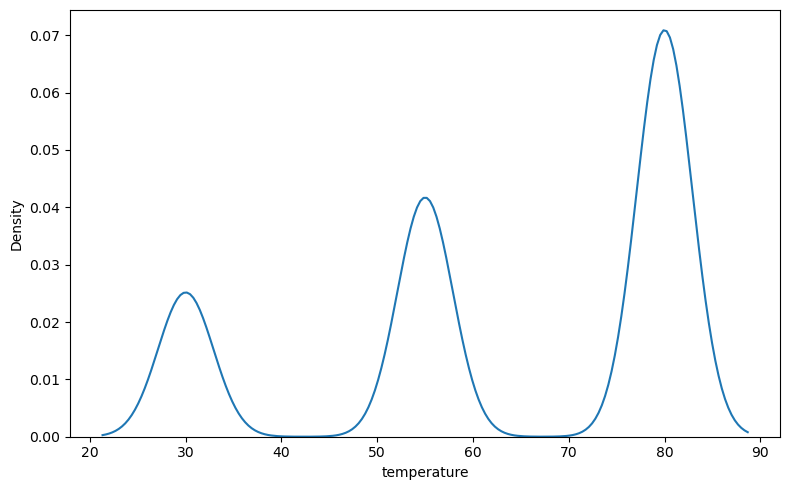

In [10]:
plt.figure(figsize= (8, 5))
sns.kdeplot(x = df['temperature'])
#plt.savefig('ua.png')
plt.tight_layout()

1. The temperature feature has a trimodal distribution, this is because the value in this feature is categorical so that the data distribution is collected on the 3 unique values.

In [14]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

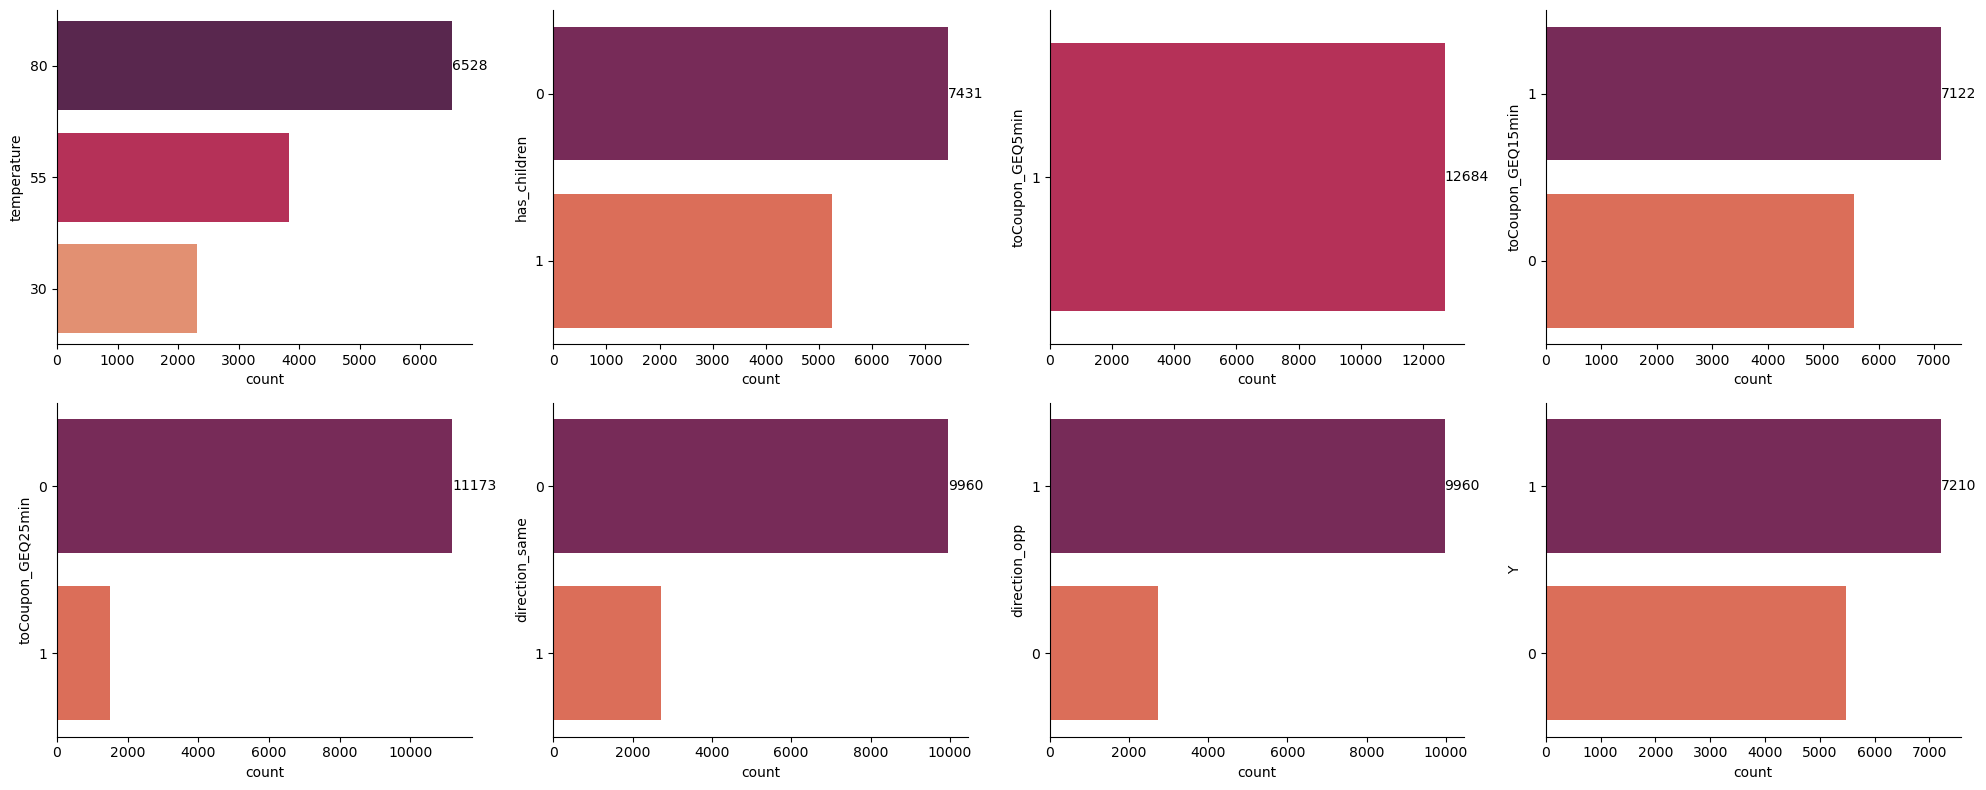

In [15]:
plt.figure(figsize=(20,8))
for i in range(len(num)):
    plt.subplot(2, 4, i+1)
    ax = sns.countplot(y=num[i], data=df, palette='rocket', order=df[num[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    sns.despine()
plt.tight_layout()
plt.savefig('ua_bar_num.png')

2. The toCoupon_GEQ5min feature only has 1 unique value. Because it is considered that this feature cannot provide insight, it will be dropped at the pre-processing stage.

3. The direction_opp feature needs to be dropped during data pre-processing because this feature has the same value as the direction_same feature, so only one of them is needed.

In [16]:
cat

['destination',
 'passanger',
 'weather',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'education',
 'occupation',
 'income',
 'car',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50']

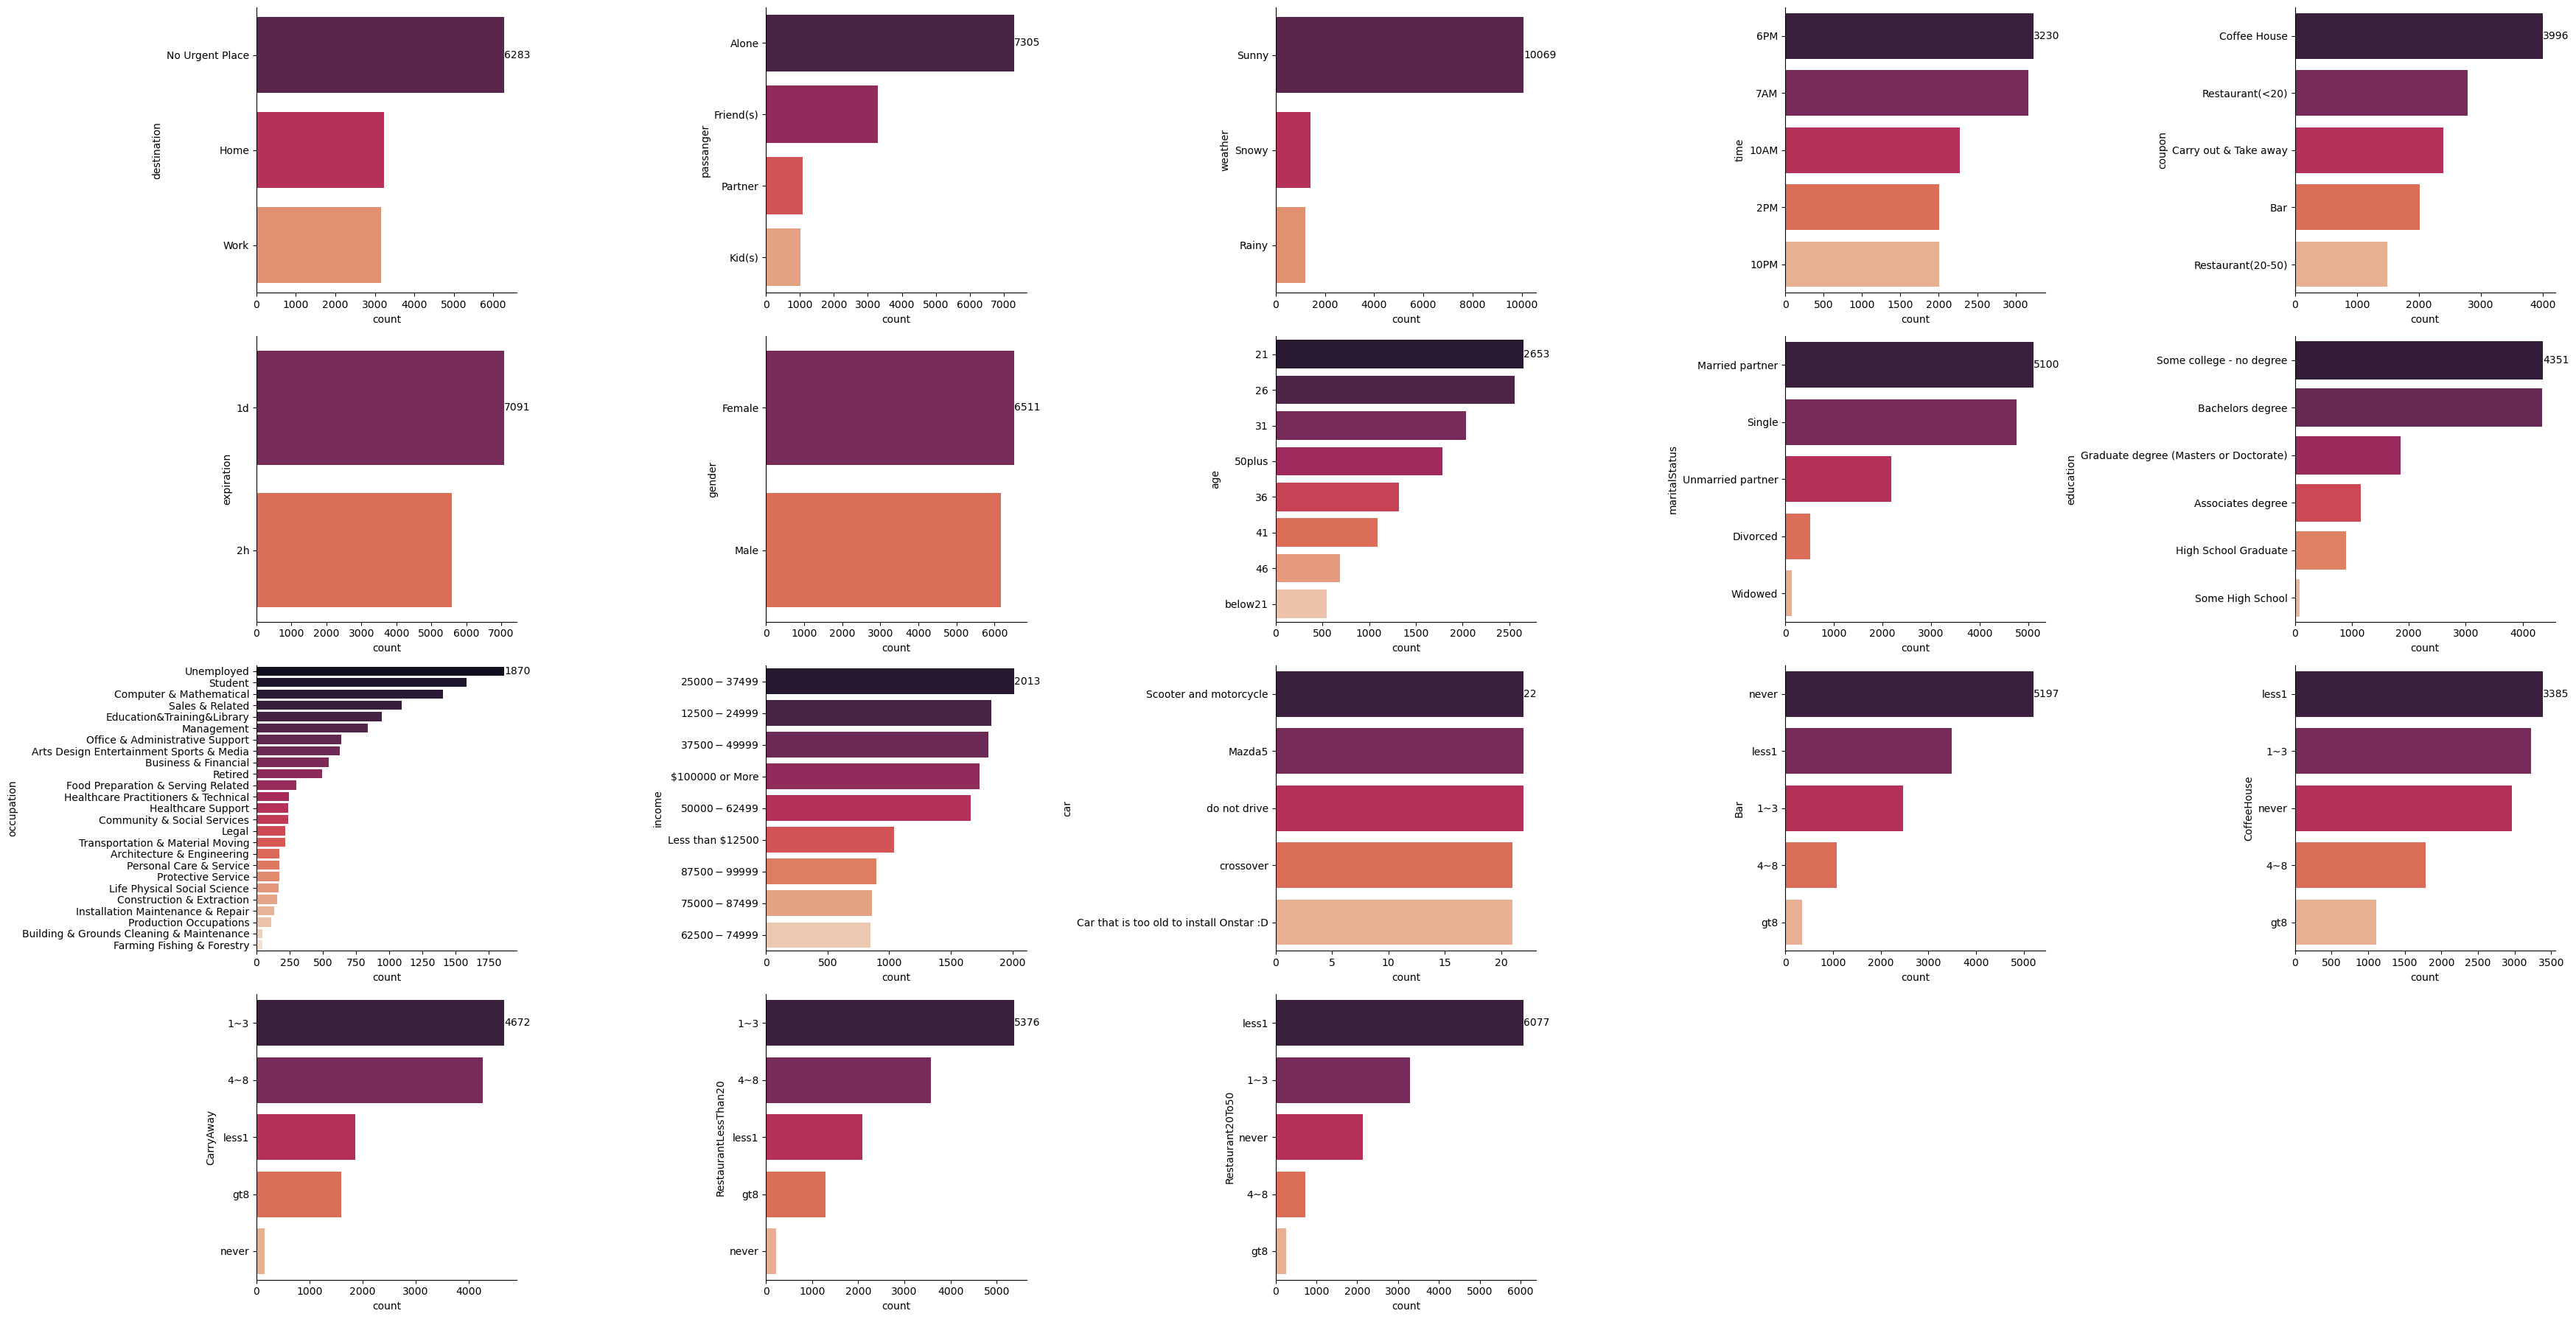

In [17]:
plt.figure(figsize=(35,18))
for i in range(len(cat)):
    plt.subplot(4, 5, i+1)
    ax = sns.countplot(y=cat[i], data=df, palette='rocket', order=df[cat[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    sns.despine()
plt.tight_layout()
plt.savefig('ua_bar.png')

4. The occupation feature has too many categories, it is necessary to summarize the categories during data pre-processing. The occupation feature is dominated by the unemployed category.

5. Age features can be summarized into categories during data pre-processing.

6. The car feature has too many missing values, so it needs to be dropped during data pre-processing.

7. The destination feature is dominated by 'No Urgent Place', the passenger feature is dominated by 'Alone', the weather feature is dominated by 'Sunny', the bar feature is dominated by 'never', the RestaurantLessThan20 feature is dominated by '1~3', the Restaurant20to50 feature is dominated by 'less1', the coupon feature is dominated by CoffeeHouse.




# MULTIVARIATE ANALYSIS

In [18]:
#import dataset as dummy
df_dummy = pd.read_csv("in-vehicle-coupon-recommendation.csv")
pd.set_option('display.max_columns', None)
df_dummy.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [19]:
df_dummy = df_dummy.drop(columns='car')

In [20]:
#checking age unique value
df['age'].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [21]:
#categorize it to be more simple
age_list = []
for i in df['age']:
    if i == 'below21':
        age = '<21'
    elif i == '21' or i == '26':
        age = '21-30'
    elif i == '31' or i == '36':
        age = '31-40'
    elif i == '41' or i == '46':
        age = '41-50'
    else:
        age = '>50'
    age_list.append(age)
df_dummy['age'] = age_list

In [22]:
#checking new age unique value
df_dummy['age'].value_counts()

age
21-30    5212
31-40    3358
>50      1788
41-50    1779
<21       547
Name: count, dtype: int64

In [23]:
#checking occupation unique value
df['occupation'].value_counts()

occupation
Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science           

In [24]:
#categorize it to be more simple
occupation_list = []
for i in df['occupation']:
    if i == 'Installation Maintenance & Repair' or i == 'Transportation & Material Moving' or i == 'Food Preparation & Serving Related' or i == 'Building & Grounds Cleaning & Maintenance':
        occupation = 'Crafts'
    elif i == 'Architecture & Engineering' or i == 'Education&Training&Library' or i == 'Healthcare Practitioners & Technical' or i == 'Management' or i == 'Arts Design Entertainment Sports & Media' or i == 'Computer & Mathematical' or i == 'Legal' or i == 'Business & Financial':
        occupation = 'Professionals'
    elif i == 'Retired':
        occupation = 'Retired'
    elif i == 'Sales & Related' or i == 'Personal Care & Service' or i == 'Protective Service':
        occupation = 'Service and sales'
    elif i == 'Student':
        occupation = 'Student'
    elif i == 'Healthcare Support' or i == 'Life Physical Social Science' or i == 'Community & Social Services' or i == 'Construction & Extraction':
        occupation = 'Technicians'
    elif i == 'Unemployed':
        occupation = 'Unemployed'
    else:
        occupation = 'Others'
    occupation_list.append(occupation)
df_dummy['occupation'] = occupation_list

In [9]:
#checking new occupation unique value
df_dummy['occupation'].value_counts()

Professionals        5000
Unemployed           1870
Student              1584
Service and sales    1443
Technicians           807
Others                792
Crafts                693
Retired               495
Name: occupation, dtype: int64

In [33]:
df['CoffeeHouse'].value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [93]:
df['weather'].value_counts()

Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64

In [32]:
#label encoding proccess
df_ma = df_dummy.replace({'expiration':{'2h': 0, '1d' : 1},
                    'gender':{'Male': 0, 'Female' : 1},
                    'age':{'<21': 0, '21-30': 1, '31-40': 2, '41-50': 3, '>50': 4},
                    'education':{'Some High School': 0, 'High School Graduate': 1, 'Some college - no degree': 2, 'Associates degree': 3, 'Bachelors degree': 4, 'Graduate degree (Masters or Doctorate)': 5},
                    'Bar':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
                    'CoffeeHouse':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}, 
                    'CarryAway':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}, 
                    'RestaurantLessThan20':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}, 
                    'Restaurant20To50':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
                    'temperature':{30: 0, 55: 1, 80: 2}})
df_ma.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,1,2PM,Restaurant(<20),1,1,1,Unmarried partner,1,2,Unemployed,$37500 - $49999,0.0,0.0,NaN,3.0,2.0,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,2,10AM,Coffee House,0,1,1,Unmarried partner,1,2,Unemployed,$37500 - $49999,0.0,0.0,NaN,3.0,2.0,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,2,10AM,Carry out & Take away,0,1,1,Unmarried partner,1,2,Unemployed,$37500 - $49999,0.0,0.0,NaN,3.0,2.0,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,2,2PM,Coffee House,0,1,1,Unmarried partner,1,2,Unemployed,$37500 - $49999,0.0,0.0,NaN,3.0,2.0,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,2,2PM,Coffee House,1,1,1,Unmarried partner,1,2,Unemployed,$37500 - $49999,0.0,0.0,NaN,3.0,2.0,1,1,0,0,1,0


In [33]:
obj_df_ma = df_ma.select_dtypes(include=['object']).copy()
obj_df_ma.head()

,destination,passanger,weather,time,coupon,maritalStatus,occupation,income
0,No Urgent Place,Alone,Sunny,2PM,Restaurant(<20),Unmarried partner,Unemployed,$37500 - $49999
1,No Urgent Place,Friend(s),Sunny,10AM,Coffee House,Unmarried partner,Unemployed,$37500 - $49999
2,No Urgent Place,Friend(s),Sunny,10AM,Carry out & Take away,Unmarried partner,Unemployed,$37500 - $49999
3,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,Unmarried partner,Unemployed,$37500 - $49999
4,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,Unmarried partner,Unemployed,$37500 - $49999


In [34]:
df_ma = df_ma.drop(['destination', 'passanger', 'weather', 'time', 'coupon', 'maritalStatus', 'occupation', 'income'], axis=1)

In [35]:
obj_df_ma_1 = obj_df_ma.astype('category')
obj_df_ma_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   destination    12684 non-null  category
 1   passanger      12684 non-null  category
 2   weather        12684 non-null  category
 3   time           12684 non-null  category
 4   coupon         12684 non-null  category
 5   maritalStatus  12684 non-null  category
 6   occupation     12684 non-null  category
 7   income         12684 non-null  category
dtypes: category(8)
memory usage: 101.0 KB


In [36]:
obj_df_ma_1['destination'] = obj_df_ma_1['destination'].cat.codes
obj_df_ma_1['passanger'] = obj_df_ma_1['passanger'].cat.codes
obj_df_ma_1['weather'] = obj_df_ma_1['weather'].cat.codes
obj_df_ma_1['time'] = obj_df_ma_1['time'].cat.codes
obj_df_ma_1['coupon'] = obj_df_ma_1['coupon'].cat.codes
obj_df_ma_1['maritalStatus'] = obj_df_ma_1['maritalStatus'].cat.codes
obj_df_ma_1['occupation'] = obj_df_ma_1['occupation'].cat.codes
obj_df_ma_1['income'] = obj_df_ma_1['income'].cat.codes
obj_df_ma_1.head()

,destination,passanger,weather,time,coupon,maritalStatus,occupation,income
0,1,0,2,2,4,3,7,3
1,1,1,2,0,2,3,7,3
2,1,1,2,0,1,3,7,3
3,1,1,2,2,2,3,7,3
4,1,1,2,2,2,3,7,3


In [45]:
df_final_2 = pd.concat([df_ma, obj_df_ma_1], axis=1)
df_final_2 = df_final_2[['destination', 'passanger', 'weather', 'time', 'coupon', 'maritalStatus', 'occupation', 'income', 'temperature', 'expiration', 'gender', 'age', 'has_children',
            'education', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
            'direction_same', 'direction_opp', 'Y']]

In [143]:
df_final_2['destination'].value_counts()

1    6283
0    3237
2    3164
Name: destination, dtype: int64

In [98]:
df_ma_final = pd.get_dummies(df_ma, columns=['destination', 'passanger', 'weather', 'time', 'coupon', 'maritalStatus', 'occupation', 'income'],
            prefix=['dest', 'pass', 'weather', 'time', 'coupon', 'marital', 'occup', 'income'])
df_ma_final.head()

,temperature,expiration,gender,age,has_children,education,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,dest_Home,dest_No Urgent Place,dest_Work,pass_Alone,pass_Friend(s),pass_Kid(s),pass_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),marital_Divorced,marital_Married partner,marital_Single,marital_Unmarried partner,marital_Widowed,occup_Crafts,occup_Others,occup_Professionals,occup_Retired,occup_Service and sales,occup_Student,occup_Technicians,occup_Unemployed,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500
0,1,1,1,1,1,2,0.0,0.0,NaN,3.0,2.0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,2,0,1,1,1,2,0.0,0.0,NaN,3.0,2.0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,2,0,1,1,1,2,0.0,0.0,NaN,3.0,2.0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,2,0,1,1,1,2,0.0,0.0,NaN,3.0,2.0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,2,1,1,1,1,2,0.0,0.0,NaN,3.0,2.0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


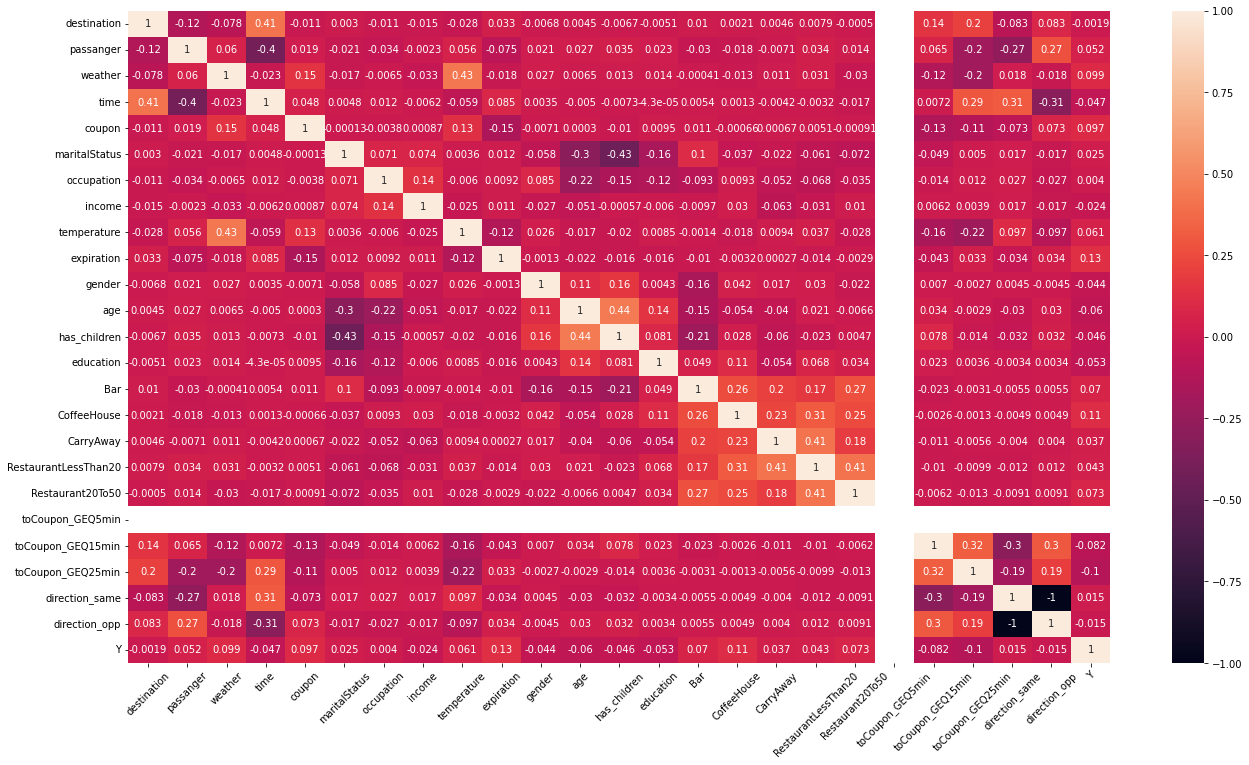

In [46]:
plt.figure(figsize = (22,12))
sns.heatmap(df_final_2.corr(), annot=True)
plt.xticks(rotation=45)
plt.savefig('ma.png')
plt.show()


A. Based on the results of the correlation calculations, the relevant feature columns are:

1. Passanger
2. Time
3. Weather
4. Coupon
5. Temperature
6. Expiration
7. Age
8. Education
8. Bar
9. CoffeeHouse
10. Carry Away
11. RestauranLessThan 20
12. Restaurant 20 To 50
13. direction_same
14. toCoupon_GEQ 15 min
15. toCoupon_GEQ 25 min

B. There are features that are considered to have a correlation with the target but based on the correlation calculation, the value is very small, such as destination, time, direction_same. The estimation so far is because these features are not suitable for label encoding because the data type in these features is not ordinal/2 unique values.


C. In addition, other features that are considered to have a correlation with the target but based on the correlation calculation, the value is very small, such as CarryAway and RestaurantLessThan 20. The estimate so far is because these features still have missing values ​​when the correlation calculation is carried out so that the value is smaller than it should be.

D. The direction_same feature has a perfect correlation value with direction_opp, this strengthens the original purpose of dropping one of them so as not to cause multicollinearity.

In [26]:
def show_val(ax):
    for b in ax.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = b.get_y() + b.get_height() + (b.get_height() * 0.01)
        val = b.get_height()
        ax.text(x, y, val, ha = 'center')
        
def show_val_percent(ax):
    for b in ax.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = b.get_y() + b.get_height() + (b.get_height() * 0.01)
        val = f'{b.get_height():.2f}%'
        ax.text(x, y, val, ha = 'center')
        
def show_val_int(ax):
    for b in ax.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = b.get_y() + b.get_height() + (b.get_height() * 0.01)
        val = int(b.get_height())
        ax.text(x, y, val, ha = 'center')

In [27]:
def df_group(col):
    dfg = df.groupby([col, 'Y']).agg({'toCoupon_GEQ5min':'count'}).reset_index()
    dfg_sum = df.groupby(col).agg({'toCoupon_GEQ5min':'count'})
    dfg = dfg.merge(dfg_sum, on = col)
    dfg.rename(columns={'toCoupon_GEQ5min_x':'customers', 'toCoupon_GEQ5min_y':'total_customer'}, inplace=True)
    dfg['percentage'] = round((dfg['customers']/dfg['total_customer']) * 100, 2)
    return dfg

def barplot(col):
    df1 = df_group(col)
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
    sns.barplot(x = col, y= 'customers', hue = 'Y', data = df1, ax = ax[0])
    ax[0].set_ylabel('Total Customer')
    show_val_int(ax[0])
    sns.barplot(x = col, y= 'percentage', hue = 'Y', data = df1, ax = ax[1])
    show_val_percent(ax[1])
    
def continousplot(col):
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
    sns.boxplot(x = 'Y', y = col, data = df, ax = ax[0])
    sns.histplot(x = col, hue = 'Y', data = df, ax = ax[1])

In [28]:
cat

['destination',
 'passanger',
 'weather',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'education',
 'occupation',
 'income',
 'car',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50']

In [29]:
num

['temperature',
 'has_children',
 'toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp',
 'Y']

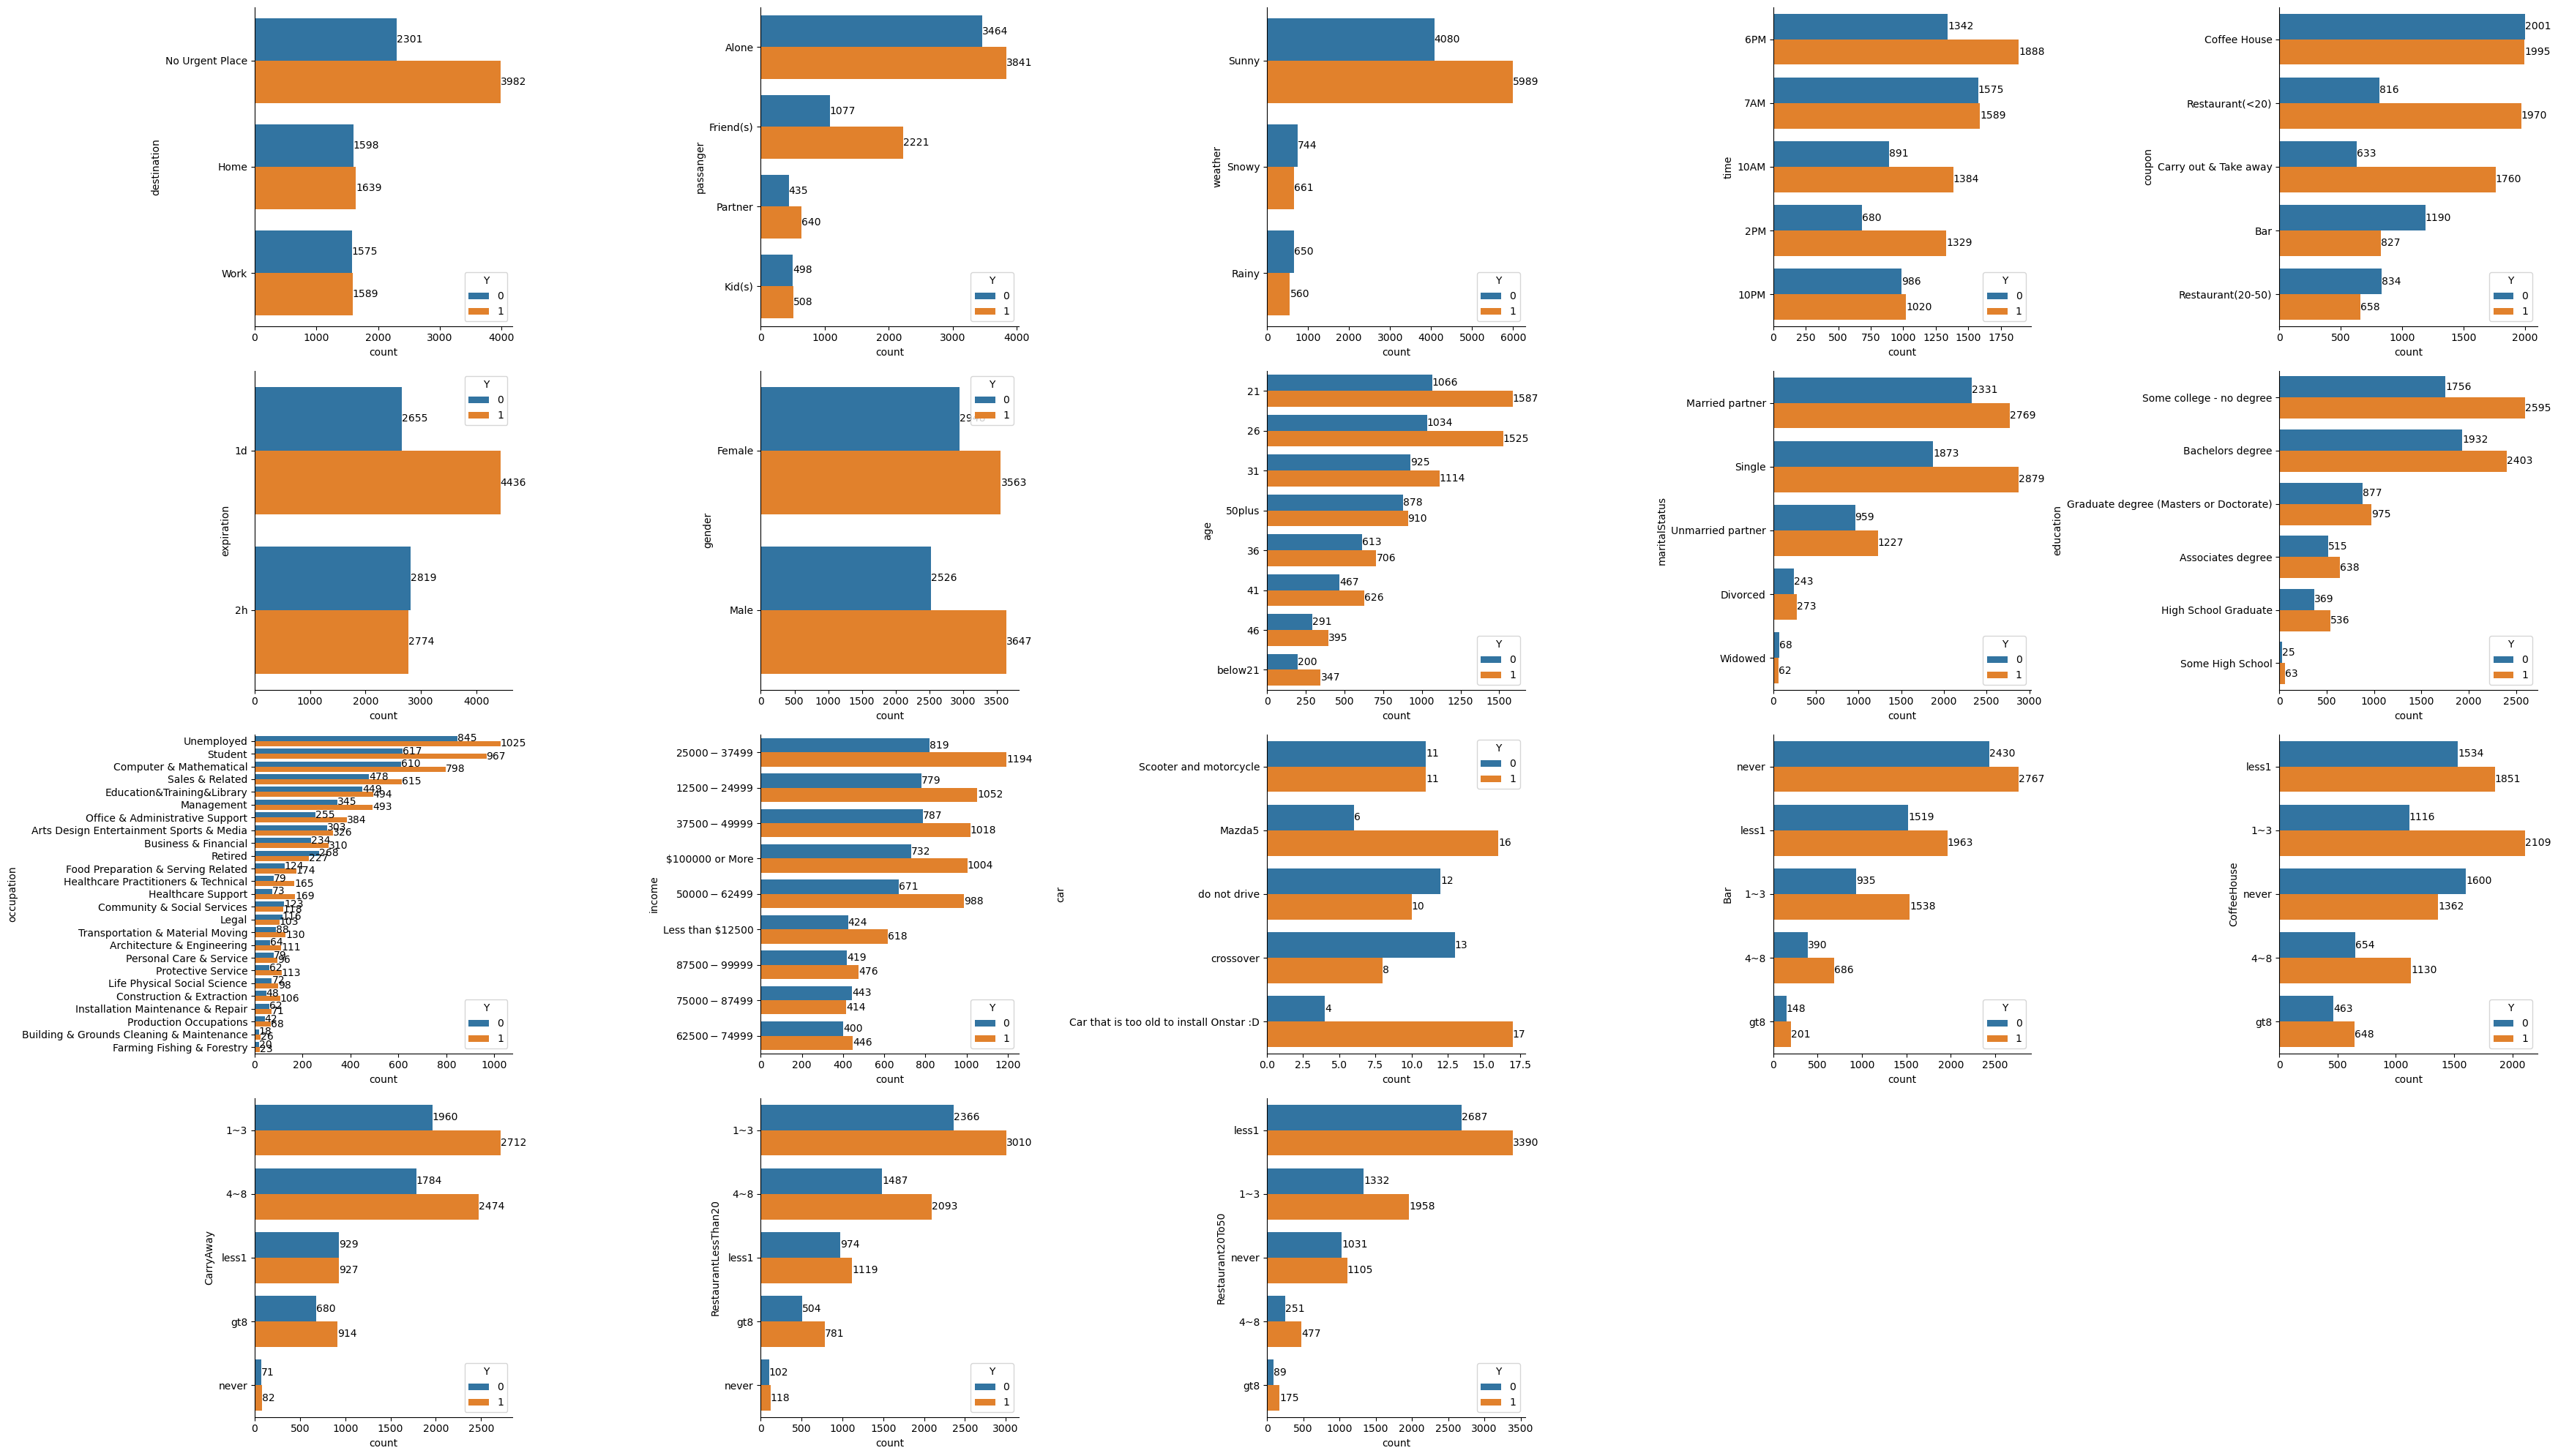

In [30]:
plt.figure(figsize = (35,20))
for i in range(len(cat)):
    plt.subplot(4, 5, i+1)
    ax = sns.countplot(y = cat[i], hue = 'Y', data = df, order=df[cat[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    plt.bar_label(ax.containers[1])
    sns.despine()
plt.tight_layout()
plt.savefig('ma_bar.png')

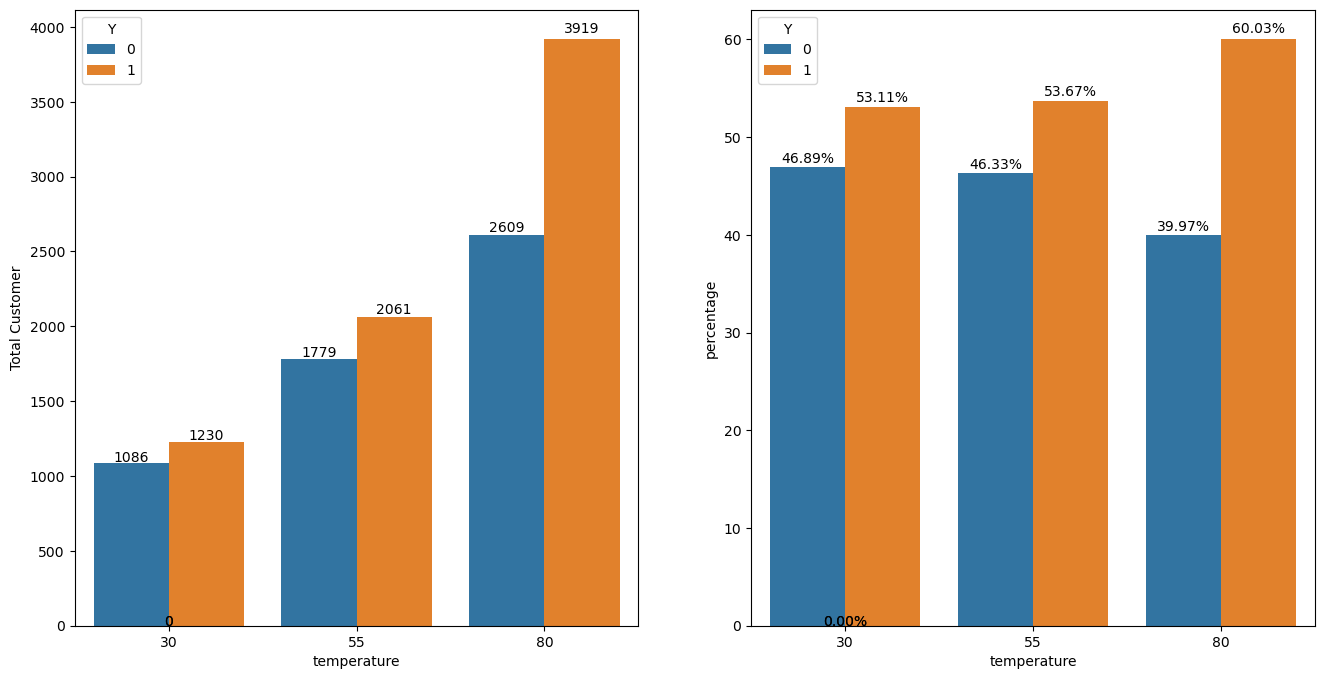

In [31]:
barplot('temperature')

In the "destination" feature, it appears that the riders who receive the most coupons are riders with the destination "No Urgent Place" while the destinations "home" and "work" have lower equivalent values. 

In the "weather" feature, it is known that coupons are most widely received by riders in "sunny" weather conditions compared to "snowy" and "rainy". 

It is known that the "time" for receiving the most coupons is at "10AM", "2PM" and "6PM" compared to other times. 

It is known that in the "coupon type" feature, the coupons most widely received by riders are the "RestaurantLessThan20" and "carry out and take away" coupon types. 

In the "expiration" feature, coupons are more often chosen in the "1d" expiration category than "2h". 

In the "marital status" feature, coupon recipients are dominated by riders with the status "single" and "marriage couple". 

At the "education" level, it can be seen that the largest number of recipients are from "college non-degree" and "bachelor" educational statuses.

# BUSINESS INSIGHT

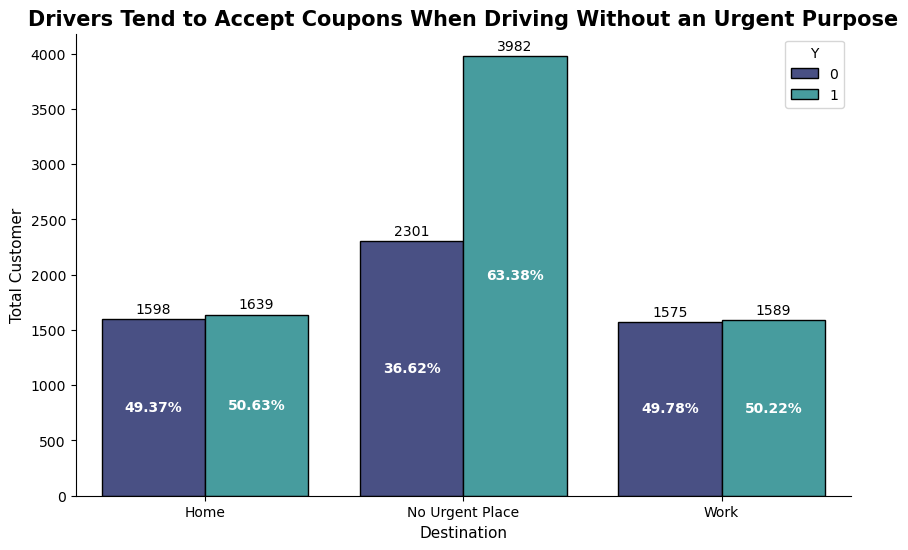

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Drivers Tend to Accept Coupons When Driving Without an Urgent Purpose", fontsize=15, color='black', weight='bold')
sns.barplot(x='destination', y='customers', data=df_group('destination'), hue='Y', edgecolor='black', palette='mako')

plt.xlabel('Destination', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.bar_label(ax.containers[0], ['49.37%', '36.62%', '49.78%'], label_type='center', color='white', weight='bold')
plt.bar_label(ax.containers[1], ['50.63%', '63.38%', '50.22%'], label_type='center', color='white', weight='bold')

sns.despine()

plt.savefig('destination.png')
plt.show()

The number of driver customers who received coupons was much higher when they did not have a specific destination when driving (3,982). The coupon acceptance ratio was also the highest (63.38%) compared to the others. This is because there is no urgency when driving, meaning that the target driver customers have more free time to visit the coupon location to use, so the acceptance rate is higher than the others.

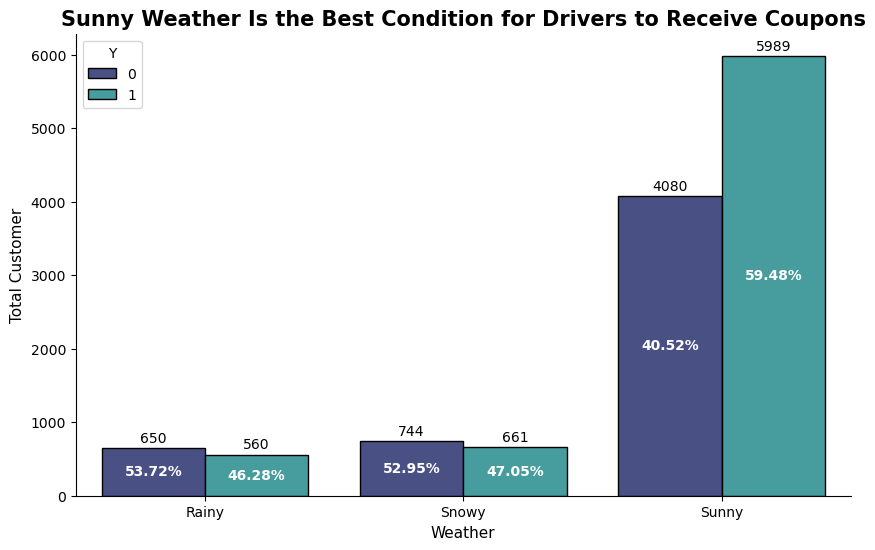

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Sunny Weather Is the Best Condition for Drivers to Receive Coupons", fontsize=15, color='black', weight='bold')
sns.barplot(x='weather', y='customers', data=df_group('weather'), hue='Y', edgecolor='black', palette='mako')

plt.xlabel('Weather', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.bar_label(ax.containers[0], ['53.72%', '52.95%', '40.52%'], label_type='center', color='white', weight='bold')
plt.bar_label(ax.containers[1], ['46.28%', '47.05%', '59.48%'], label_type='center', color='white', weight='bold')

sns.despine()

plt.savefig('weather.png')
plt.show()

The number of driver customers who received coupons was much higher when the weather was sunny (10.0970), in addition, the ratio of those who received coupons was also the highest (59.48%) compared to other weather conditions. This could be because not many driver customers leave the house to do activities when the weather is rainy or snowy. Therefore, it is highly recommended that coupon campaigns be held in the summer/spring. Avoid holding coupon campaigns during the snowy season.

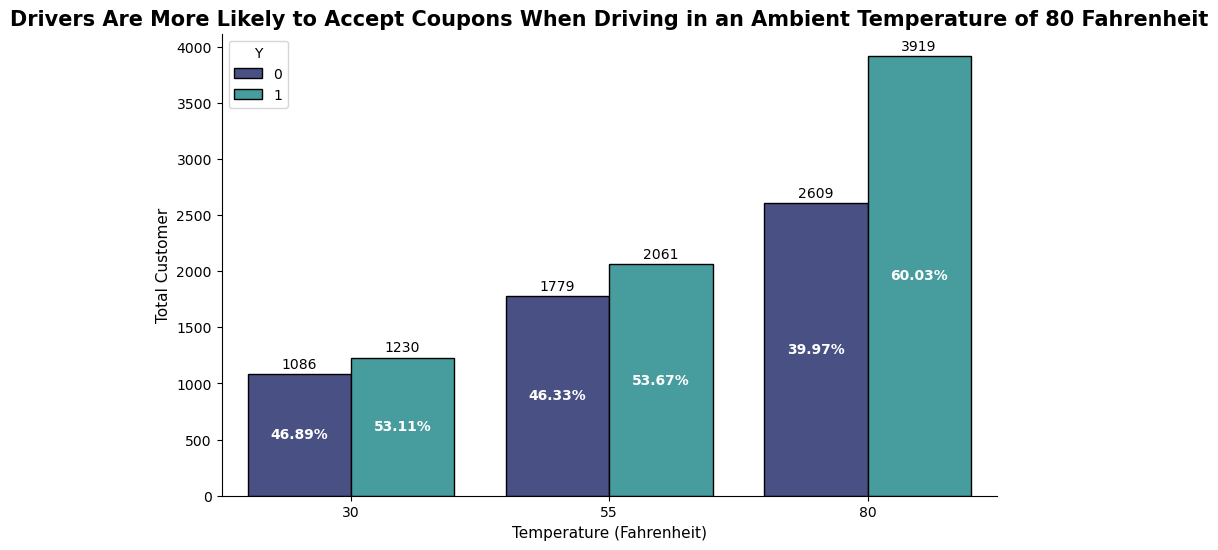

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Drivers Are More Likely to Accept Coupons When Driving in an Ambient Temperature of 80 Fahrenheit", fontsize=15, color='black', weight='bold')
sns.barplot(x='temperature', y='customers', data=df_group('temperature'), hue='Y', edgecolor='black', palette='mako')

plt.xlabel('Temperature (Fahrenheit)', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.bar_label(ax.containers[0], ['46.89%', '46.33%', '39.97%'], label_type='center', color='white', weight='bold')
plt.bar_label(ax.containers[1], ['53.11%', '53.67%', '60.03%'], label_type='center', color='white', weight='bold')

sns.despine()

plt.savefig('temperature.png')
plt.show()

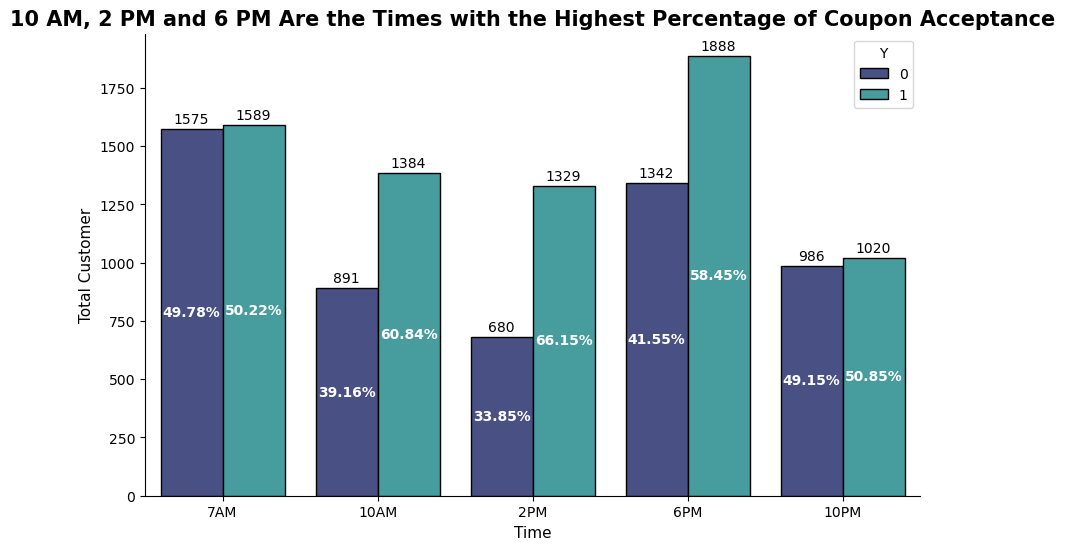

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("10 AM, 2 PM and 6 PM Are the Times with the Highest Percentage of Coupon Acceptance", fontsize=15, color='black', weight='bold')
sns.barplot(x='time', y='customers', data=df_group('time'), hue='Y', order=['7AM', '10AM', '2PM', '6PM', '10PM'], edgecolor='black', palette='mako')

plt.xlabel('Time', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.bar_label(ax.containers[0], ['49.78%', '39.16%', '33.85%', '41.55%', '49.15%'], label_type='center', color='white', weight='bold')
plt.bar_label(ax.containers[1], ['50.22%', '60.84%', '66.15%', '58.45%', '50.85%'], label_type='center', color='white', weight='bold')

sns.despine()

plt.savefig('time_png')
plt.show()

In [37]:
df_6pm = df[df['time'] == '6PM'].groupby(['destination', 'Y']).agg({'toCoupon_GEQ5min':'count'}).reset_index()
df_6pm_sum = df_6pm.groupby('destination').agg({'toCoupon_GEQ5min':'sum'})
df_6pm = df_6pm.merge(df_6pm_sum, on = 'destination')
df_6pm.rename(columns={'toCoupon_GEQ5min_x':'customers', 'toCoupon_GEQ5min_y':'total_customer'}, inplace=True)
df_6pm['percentage'] = round((df_6pm['customers']/df_6pm['total_customer']) * 100, 2)
df_6pm

,destination,Y,customers,total_customer,percentage
0,Home,0,969,2123,45.64
1,Home,1,1154,2123,54.36
2,No Urgent Place,0,373,1107,33.69
3,No Urgent Place,1,734,1107,66.31


In [38]:
df_10am = df[df['time'] == '10AM'].groupby(['destination', 'Y']).agg({'toCoupon_GEQ5min':'count'}).reset_index()
df_10am_sum = df_10am.groupby('destination').agg({'toCoupon_GEQ5min':'sum'})
df_10am = df_10am.merge(df_10am_sum, on = 'destination')
df_10am.rename(columns={'toCoupon_GEQ5min_x':'customers', 'toCoupon_GEQ5min_y':'total_customer'}, inplace=True)
df_10am['percentage'] = round((df_10am['customers']/df_10am['total_customer']) * 100, 2)
df_10am

,destination,Y,customers,total_customer,percentage
0,No Urgent Place,0,891,2275,39.16
1,No Urgent Place,1,1384,2275,60.84


In [44]:
df_2pm = df[df['time'] == '2PM'].groupby(['destination', 'Y']).agg({'toCoupon_GEQ5min':'count'}).reset_index()
df_2pm_sum = df_2pm.groupby('destination').agg({'toCoupon_GEQ5min':'sum'})
df_2pm = df_2pm.merge(df_2pm_sum, on = 'destination')
df_2pm.rename(columns={'toCoupon_GEQ5min_x':'customers', 'toCoupon_GEQ5min_y':'total_customer'}, inplace=True)
df_2pm['percentage'] = round((df_2pm['customers']/df_2pm['total_customer']) * 100, 2)
df_2pm

,destination,Y,customers,total_customer,percentage
0,No Urgent Place,0,680,2009,33.85
1,No Urgent Place,1,1329,2009,66.15


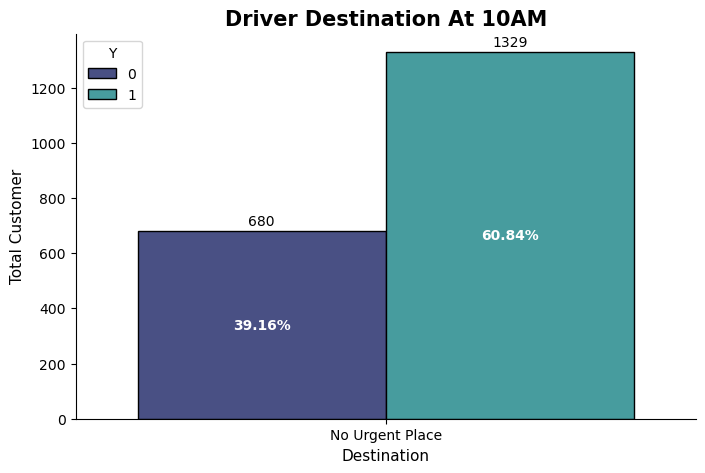

In [45]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.title("Driver Destination At 10AM", fontsize=15, color='black', weight='bold')
sns.barplot(x='destination', y='customers', data=df_2pm, hue='Y', edgecolor='black', palette='mako')

plt.xlabel('Destination', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.bar_label(ax.containers[0], ['39.16%'], label_type='center', color='white', weight='bold')
plt.bar_label(ax.containers[1], ['60.84%'], label_type='center', color='white', weight='bold')

sns.despine()

plt.savefig('10am.png')
plt.show()

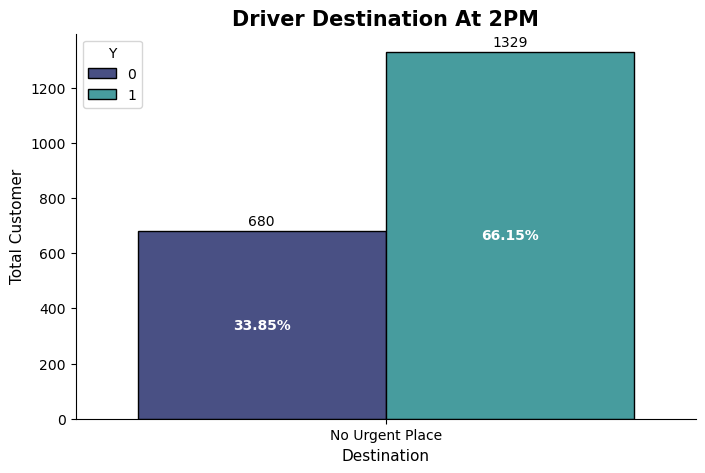

In [46]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.title("Driver Destination At 2PM", fontsize=15, color='black', weight='bold')
sns.barplot(x='destination', y='customers', data=df_2pm, hue='Y', edgecolor='black', palette='mako')

plt.xlabel('Destination', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.bar_label(ax.containers[0], ['33.85%'], label_type='center', color='white', weight='bold')
plt.bar_label(ax.containers[1], ['66.15%'], label_type='center', color='white', weight='bold')

sns.despine()

plt.savefig('2pm.png')
plt.show()

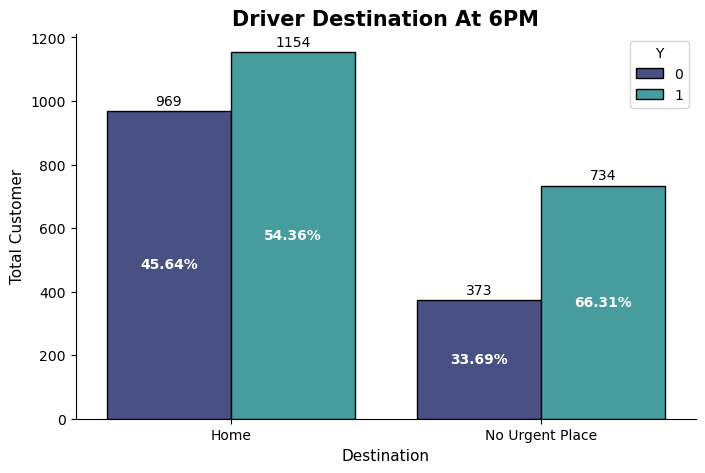

In [47]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.title("Driver Destination At 6PM", fontsize=15, color='black', weight='bold')
sns.barplot(x='destination', y='customers', data=df_6pm, hue='Y', edgecolor='black', palette='mako')

plt.xlabel('Destination', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.bar_label(ax.containers[0], ['45.64%', '33.69%'], label_type='center', color='white', weight='bold')
plt.bar_label(ax.containers[1], ['54.36%', '66.31%'], label_type='center', color='white', weight='bold')

sns.despine()

plt.savefig('6pm.png')
plt.show()

The number of driver customers who received coupons was high at 10 AM (1,384), 2 PM (1,329) and 6 PM (1,888). After further analysis, it turned out that this was caused by the driver customer destinations at those hours being only 2, namely no urgent destinations and home. At 10 AM and 2 PM, all driver customers did not have urgent destinations. The coupon acceptance ratio was also high, namely (60.84%) and (66.15%). Then, at 6 PM, the driver customer destinations consisted of no urgent destinations and home. Even so, the coupon acceptance ratio remained high (54.36%) and (66.31%). This could be due to the situation of driver customers when driving home while looking for food for home. 

Based on the destination and time variables, it is highly recommended that coupons be given massively at 10 AM, 2 PM and 6 PM. Because the driver customer destinations at 6 PM are home, giving CarryAway coupons is the right step.

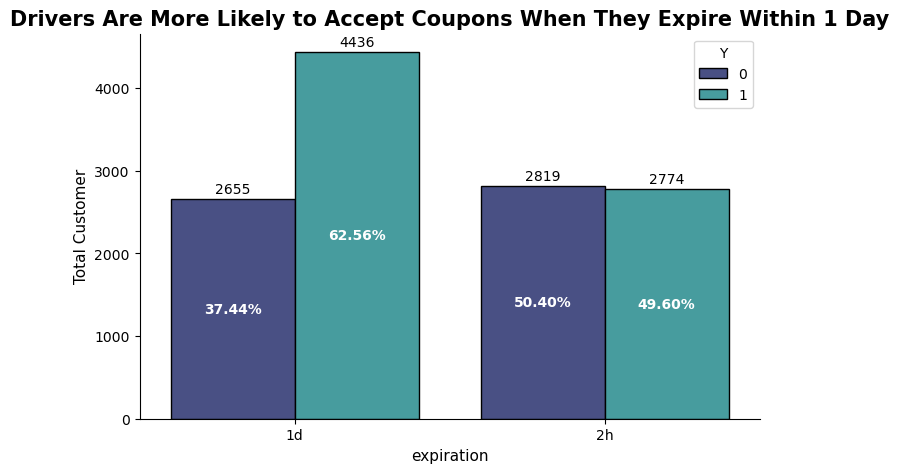

In [48]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.title("Drivers Are More Likely to Accept Coupons When They Expire Within 1 Day", fontsize=15, color='black', weight='bold')
sns.barplot(x='expiration', y='customers', data=df_group('expiration'), hue='Y', edgecolor='black', palette='mako')

plt.xlabel('expiration', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.bar_label(ax.containers[0], ['37.44%', '50.40%'], label_type='center', color='white', weight='bold')
plt.bar_label(ax.containers[1], ['62.56%', '49.60%'], label_type='center', color='white', weight='bold')

sns.despine()

plt.savefig('expiration.png')
plt.show()

Driver customers who received coupons with a validity period of 1 day had a ratio of 62.56%. While driver customers who received coupons with a validity period of 2 hours were only 49.60%. This may be because not all driver customers think about using coupons as soon as possible because there are considerations of driving location activities, coupon usage locations, etc. Therefore, it is highly recommended that coupons that will be given to driver customers are coupons that still have a validity period of 1 day and avoid giving coupons that have a short validity period.